In [1]:
%matplotlib inline
import math
from process import read_data, get_processed_data
from server.location_helper import get_most_possible_location, add_opening_data, add_name_data, get_closest_place_info

df_merged = read_data('merged_locations.csv')

df1 = get_processed_data('kuehne_2.csv')

# Remove anonymized values
for col in df1.columns.values:
    df1[col] = df1[col].apply(lambda x: str(x).replace(str(x), '') if 'XXXXX' in str(x) else x)
    df1[col] = df1[col].apply(lambda x: str(x).replace(str(x), '') if 'SAMPLE' in str(x) else x)
    df1[col] = df1[col].apply(lambda x: str(x).replace(str(x), '') if isinstance(x, float) and math.isnan(x) else x)

print df1.columns.values

Data Cleaning
Removing NaN columns
LOC_KN_CITY_CODE only contains NaNs
LOC_IATA_CITY_CODE only contains NaNs
['LOC_TIME_ZONE' 'LOC_TYPE' 'LOC_NAME1' 'LOC_STREET1' 'LOC_STREET2'
 'LOC_ISO_COUNTRY_CODE' 'LOC_POSTAL_CODE' 'LOC_CITY' 'LOC_STATE_PROVINCE']


In [2]:
# Copy values from original to new df
df_merged["name"] = df1["LOC_NAME1"]
df_merged["street"] = df1["LOC_STREET1"]
df_merged["street_addition"] = df1["LOC_STREET2"]
df_merged["postal_code"] = df1["LOC_POSTAL_CODE"]
df_merged["city"] = df1["LOC_CITY"]
df_merged["state"] = df1["LOC_STATE_PROVINCE"]
df_merged["country"] = df1["LOC_ISO_COUNTRY_CODE"]
df_merged["location_type"] = df1["LOC_TYPE"]
#df["lat"] = 
#df["long"] =
#df["standard_opening_times"] =
#df["building_type"] =
df_merged["time_zone"] = df1["LOC_TIME_ZONE"]
#df["access_notes"]

# Post-processing
## Replace NaNs with ''
for col in df_merged.columns.values:
    df_merged[col] = df_merged[col].apply(lambda x: str(x).replace(str(x), '') if isinstance(x, float) and math.isnan(x) else x)
    
df_merged.to_csv("data/cleaned_2.csv", sep=';', header=True, index=False, encoding='utf-8')

df_merged

,name,street,street_addition,postal_code,city,state,country,location_type,lat,lng,standard_opening_times,building_type,time_zone,access_notes
NaT,S&B INTERNATIONAL,Kitmanstraat 3,,,Alkmaar,,NL,SH,,,,,Etc/GMT-1,
NaT,Groupe Ponroy Sante,Parc d'Activite,,,Bouffere,,FR,SH,,,,,Etc/GMT-1,
NaT,BRASCHLER'S COMESTIBLES,Geroldstrasse 5,,8005,Zuerich,,CH,CN,,,,,CET,
NaT,BIORIGINAL EUROPE/ASIA,Bosland 40,,,Den Bommel,,NL,SH,,,,,Etc/GMT-1,
NaT,TIBOTEC PHARMACEUTICALS LTD,Neutalstrasse 75,C/O Cilag AG,,Schaffhausen,,AT,SH,,,,,Etc/GMT-1,
NaT,Deganius-Versand,Werk 1,,,Wackersdorf,,DE,SH,,,,,Etc/GMT-1,
NaT,Alfons Miller eK,Im Unterholz 9,,,Horgenzell,,DE,SH,,,,,Etc/GMT-1,
NaT,Otto Franck Import KG,Staetzlinger Strasse 63,,86165,Augsburg,,DE,CN,,,,,CET,
NaT,Icap Leather Chem S.p.A.,Via G. Donizetti 29/31,,,Lainate (MI),,IT,SH,,,,,Etc/GMT-1,
NaT,Reinhildis-Apotheke,Heinrich-Niemeyer-Strasse 11,,,Hoerstel,,DE,SH,,,,,Etc/GMT-1,


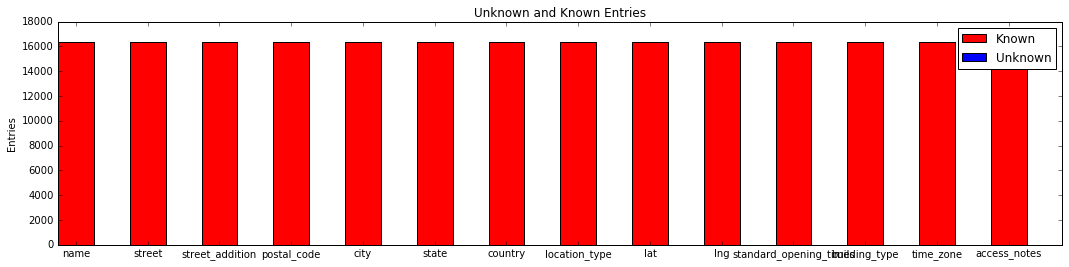

In [3]:
from process import visualize_unknown_data
visualize_unknown_data(df_merged)

In [4]:
for index, row in df_merged[:200].iterrows():
    best = get_most_possible_location(search=row['name'], street=row['street'] + ", " + row["street_addition"], postal=row['postal_code'], city=row['city'], state=row['state'], country=row['country'])
    if not best:
        best = get_most_possible_location(search=row['name'], city=row['city'])
            
    if best:
        if best["street"]:
            row["street"] = best["street"]
        if best["postal_code"]:
            row["postal_code"] = best["postal_code"]
        if best["city"]:
            row["city"] = best["city"]
        if best["state"]:
            row["state"] = best["state"]
        if best["country"]:
            row["country"] = best["country"]
        if best["lat"]:
            row["lat"] = best["lat"]
        if best["lng"]:
            row["lng"] = best["lng"]
        
        closest = get_closest_place_info(best["lat"], best["lng"])
        if closest:
            if not row["name"]:
                row["name"] = closest["name"]
            row["standard_opening_times"] = closest["opening_hours"].replace("<br/>", ", ")
df_merged

KeyboardInterrupt: 

In [ ]:
df_merged.to_csv("data/cleaned_and_normalized_2.csv", sep=';', header=True, index=False, encoding='utf-8')

In [ ]:
df_merged[df_merged["lat"] != ""].to_csv("data/lat_and_longs_2.csv", sep=';', header=True, index=False, encoding='utf-8')